In [1]:
import pandas
mais_daten=pandas.read_csv('Maisproduktion.txt',
sep="\t",
decimal=',')
mais_daten

,Jahr,Maisproduktion,Unnamed: 2,Unnamed: 3
0,1960,220,NaN,NaN
1,1970,300,NaN,NaN
2,1980,420,NaN,NaN
3,1990,520,NaN,NaN
4,2000,590,NaN,NaN
5,2001,614,NaN,NaN
6,2002,602,NaN,NaN
7,2003,640,NaN,NaN
8,2004,705,NaN,NaN


In [2]:
del mais_daten ['Unnamed: 2']
del mais_daten ['Unnamed: 3']
mais_daten

,Jahr,Maisproduktion
0,1960,220
1,1970,300
2,1980,420
3,1990,520
4,2000,590
5,2001,614
6,2002,602
7,2003,640
8,2004,705


In [3]:
mais_daten['Jahr']=mais_daten['Jahr'].astype(int)
mais_daten

,Jahr,Maisproduktion
0,1960,220
1,1970,300
2,1980,420
3,1990,520
4,2000,590
5,2001,614
6,2002,602
7,2003,640
8,2004,705


Text(0.5, 1.0, 'Streudiagramm zur Welrproduktion von Mais')

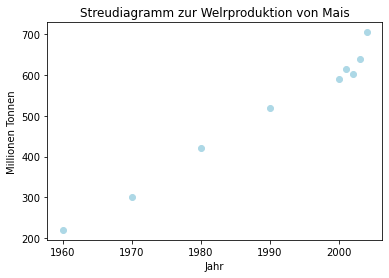

In [20]:
import matplotlib.pyplot as plt #matplotlib.pyplot ist bibliothek und "as plt" um es abzukürzen
%config inlineBackend.figure_format='svg' #damit die grafik bessere kanten hat
plt.scatter(mais_daten['Jahr'], mais_daten['Maisproduktion'],marker='o', color='darkblue')
plt.xlabel('Jahr')
plt.ylabel('Millionen Tonnen')
plt.title('Streudiagramm zur Welrproduktion von Mais')

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression

Berechnungen werden in Python meist mit der Bibliothek NumPy gemacht.
Es wird zunächst eine Hülle für das Modell angelegt.

In [6]:
mais_model=LinearRegression()

Anschließend werden die beiden Spalten in ein NumPy Array konvertiert, weil nur damit gewisse Funktionen für die Regression möglich sind.

In [7]:
x=mais_daten['Jahr']
x=x.to_numpy() #konvertiert die spalte Jahr in ein NumPy Array
x=x.reshape(-1,1)

Die methode reshape() verwandelt den ursprüunglichen Vektro x in eine 1 x n-matrix. Nur so können die Regressionskoeffizienten berechnet werden.

In [8]:
mais_model.fit(x, mais_daten['Maisproduktion'])

LinearRegression()

Um die Koefffizienten der linearen Regression zu erhlaten wird auf die Attribute der fit()-Funktion zurückgegriffen. Sie befinden sich in den Variablen intercept_ und coef_. Für die Ausgabe mti print() verwenden wir den String-Modulo Operator.

In [9]:
print('Die Gleichung der Regressionsgeraden lautet: y= %4.4f x= %4.4f'
    %(mais_model.coef_, mais_model.intercept_))

Die Gleichung der Regressionsgeraden lautet: y= 9.9850 x= -19357.7700


Um auf das R² zu zugreifen, wird mais_model.intercept_))

In [10]:
R_2=mais_model.score(x,mais_daten['Maisproduktion'])
print('Das Bestimmtheitsmaß lautet: %1.4f' % R_2)

Das Bestimmtheitsmaß lautet: 0.9788


Zeichnen wir nun die Regressionsgerade in das Streudiageramm ein. Dazu verwenden wir den Befehl predict(), der die Werte der Regressionsgerade basierend auf den vorgegebenen x-Wert ausgibt.

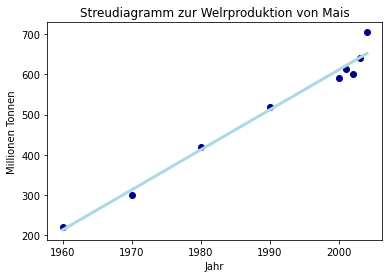

In [30]:
plt.scatter(mais_daten['Jahr'], mais_daten['Maisproduktion'],marker='o',color='darkblue')
plt.xlabel('Jahr')
plt.ylabel('Millionen Tonnen')
plt.title('Streudiagramm zur Welrproduktion von Mais')
mais_predict=mais_model.predict(x)
plt.plot(x,mais_predict,color='lightblue',linewidth=3)

Berechnung des empirischen Korrelationskoeffizienten

In [12]:
np.corrcoef(mais_daten['Jahr'], mais_daten['Maisproduktion'])

array([[1.        , 0.98935241],
       [0.98935241, 1.        ]])

In [13]:
print('Der Korrelationskoeffizient lautet: %1.4f'
     %np.corrcoef(mais_daten['Jahr'], mais_daten['Maisproduktion']) [1,0])

Der Korrelationskoeffizient lautet: 0.9894


Andere Regressionskurven ausprobieren.
e) Ändern Sie den Typ der Regressionskurve von linear in quadratisch

um die Regressionskurve von linear in quadratisch umzuändern, wird die Scikit-learn funktion PolynomialFeatures() verwendet. Sie wandelt Daten in ihre Potenzen um. Dabei handelt es sich um ein Art Preprocessing der Daten.

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
x_scaled = StandardScaler().fit_transform(x)
quad_jahr=PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_scaled)
quad_jahr

array([[-1.95008126,  3.8028169 ],
       [-1.30005417,  1.69014085],
       [-0.65002709,  0.42253521],
       [ 0.        ,  0.        ],
       [ 0.65002709,  0.42253521],
       [ 0.71502979,  0.51126761],
       [ 0.7800325 ,  0.6084507 ],
       [ 0.84503521,  0.71408451],
       [ 0.91003792,  0.82816901]])

In [38]:
x_scaled

array([[-1.95008126],
       [-1.30005417],
       [-0.65002709],
       [ 0.        ],
       [ 0.65002709],
       [ 0.71502979],
       [ 0.7800325 ],
       [ 0.84503521],
       [ 0.91003792]])

Das Bestimmtheitsmaß lautet: 0.9792


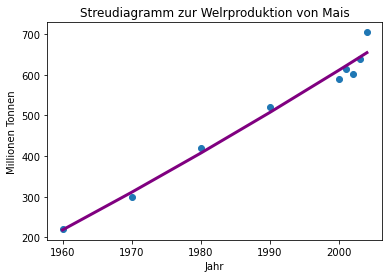

In [39]:
quad_mais_model = LinearRegression()
quad_mais_model.fit(quad_jahr, mais_daten['Maisproduktion'])

    #predicting on quadratic plynomial
quad_mais_predict = quad_mais_model.predict(quad_jahr)
plt.scatter(mais_daten['Jahr'], mais_daten['Maisproduktion'],marker='o')
plt.xlabel('Jahr')
plt.ylabel('Millionen Tonnen')
plt.title('Streudiagramm zur Welrproduktion von Mais')
plt.plot(x,quad_mais_predict,color='purple',linewidth=3)

r_sqr=quad_mais_model.score(quad_jahr,mais_daten['Maisproduktion'])
print('Das Bestimmtheitsmaß lautet: %1.4f' %r_sqr)